### **Mengimport Library**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### **Deskripsi Data**

##### Fitur Input dan Tipe
The dataset consists of 70 000 records of patients data in 12 features
| Nama Fitur                | Tipe Fitur          | Nama Kolom dalam Data | Tipe Data                  |
|---------------------------|---------------------|------------------------|----------------------------|
| **Age**                   | Objective Feature   | age                    | int (days)                 |
| **Height**                | Objective Feature   | height                 | int (cm)                   |
| **Weight**                | Objective Feature   | weight                 | float (kg)                 |
| **Gender**                | Objective Feature   | gender                 | categorical code 1 - women, 2 - men          |
| **Systolic blood pressure** | Examination Feature | ap_hi                  | int (mm/Hg)                       |
| **Diastolic blood pressure** | Examination Feature | ap_lo                  | int (mm/Hg)                        |
| **Cholesterol**           | Examination Feature | cholesterol            | 1: normal, 2: above normal, 3: well above normal |
| **Glucose**               | Examination Feature | gluc                   | 1: normal, 2: above normal, 3: well above normal |
| **Smoking**               | Subjective Feature  | smoke                  | binary; 0: no, 1 : yes                     |
| **Alcohol intake**        | Subjective Feature  | alco                   | binary; 0: no, 1 : yes                     |
| **Physical activity**     | Subjective Feature  | active                 | binary; 0: no, 1 : yes                     |
| **Presence or absence of cardiovascular disease** | Target Variable     | cardio                 | binary; 0: healthy, 1 : cardio                     |


### **Load Data**

In [3]:
df = pd.read_csv('data/cardio.csv', sep=';')

print('Sample Data')
display(df.head())


Sample Data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 1**

In [4]:
print('\nInformasi Kolom\n')
display(df.info())

print('\nStatistika Deskriptif')
display(df.describe())

print('\nMengecek Missing Values')
display(df.isnull().sum())


Informasi Kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None


Statistika Deskriptif


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



Mengecek Missing Values


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### **Data Insights Sebelum Preprocessing**

**Usia (age)**
- Rata-rata usia (mean) adalah sekitar 19.469 hari (~53,3 tahun).
- Usia minimum adalah 10.798 hari (~29,6 tahun), dan usia maksimum adalah 23.713 hari (~64,9 tahun).
- Rentang usia ini menunjukkan bahwa dataset berfokus pada populasi dewasa, mungkin dengan fokus pada populasi yang berisiko terkena penyakit kardiovaskular.

**Jenis Kelamin (gender)**
- Data ini menggunakan 1 untuk perempuan dan 2 untuk laki-laki.
- Rata-rata gender adalah 1.35, yang menunjukkan bahwa dataset ini memiliki lebih banyak perempuan daripada laki-laki.

**Tinggi Badan (height)**
- Rata-rata tinggi badan adalah 164,36 cm, dengan standar deviasi 8,21 cm.
- Nilai minimum dan maksimum (55 cm hingga 250 cm) mengindikasikan adanya beberapa anomali data atau kesalahan pengukuran.

**Berat Badan (weight)**
- Berat badan rata-rata adalah 74,21 kg dengan standar deviasi 14,40 kg.
- Nilai berat minimum 10 kg dan maksimum 200 kg menunjukkan kemungkinan kesalahan atau anomali dalam data.

**Tekanan Darah Sistolik (ap_hi)**
- Nilai rata-rata adalah 128,82 mmHg, dengan standar deviasi yang sangat tinggi (154 mmHg).
- Ada nilai tekanan darah negatif (-150 mmHg), dan nilai maksimum yang sangat tinggi (16.020 mmHg), yang jelas merupakan outlier atau kesalahan input data.

**Tekanan Darah Diastolik (ap_lo)**
- Rata-rata tekanan diastolik adalah 96,63 mmHg.
- Sama seperti tekanan sistolik, terdapat outlier ekstrem (negatif hingga 11.000 mmHg), yang mengindikasikan kesalahan atau outlier dalam data.

**Kolesterol (cholesterol)**
- Data ini diklasifikasikan ke dalam 3 kategori (1, 2, 3).
- Nilai rata-rata adalah 1,37, artinya sebagian besar subjek memiliki tingkat kolesterol normal (kategori 1), dengan sebagian lainnya memiliki tingkat kolesterol di atas normal (kategori 2 atau 3).

**Glukosa (gluc)**
- Sama dengan kolesterol, glukosa juga diklasifikasikan menjadi 3 kategori.
- Rata-rata adalah 1,23, menunjukkan sebagian besar orang memiliki kadar glukosa normal.

**Perilaku Merokok (smoke)**
- Hanya sekitar 8,8% dari sampel yang merokok, ditunjukkan oleh nilai rata-rata 0,088.

**Konsumsi Alkohol (alco)**
- Rata-rata adalah 0,053, menunjukkan hanya sekitar 5,3% orang yang mengonsumsi alkohol secara rutin.

**Aktivitas Fisik (active)**
- Sebagian besar individu aktif secara fisik (rata-rata 0,80), yang berarti sekitar 80% dari data mewakili orang-orang yang terlibat dalam aktivitas fisik.

**Penyakit Kardiovaskular (cardio)**
- Dataset cukup seimbang terkait label target ini, dengan rata-rata 0,50, yang menunjukkan bahwa sekitar 50% dari sampel memiliki kondisi kardiovaskular.


#### **Distribusi Variabel Numerik**

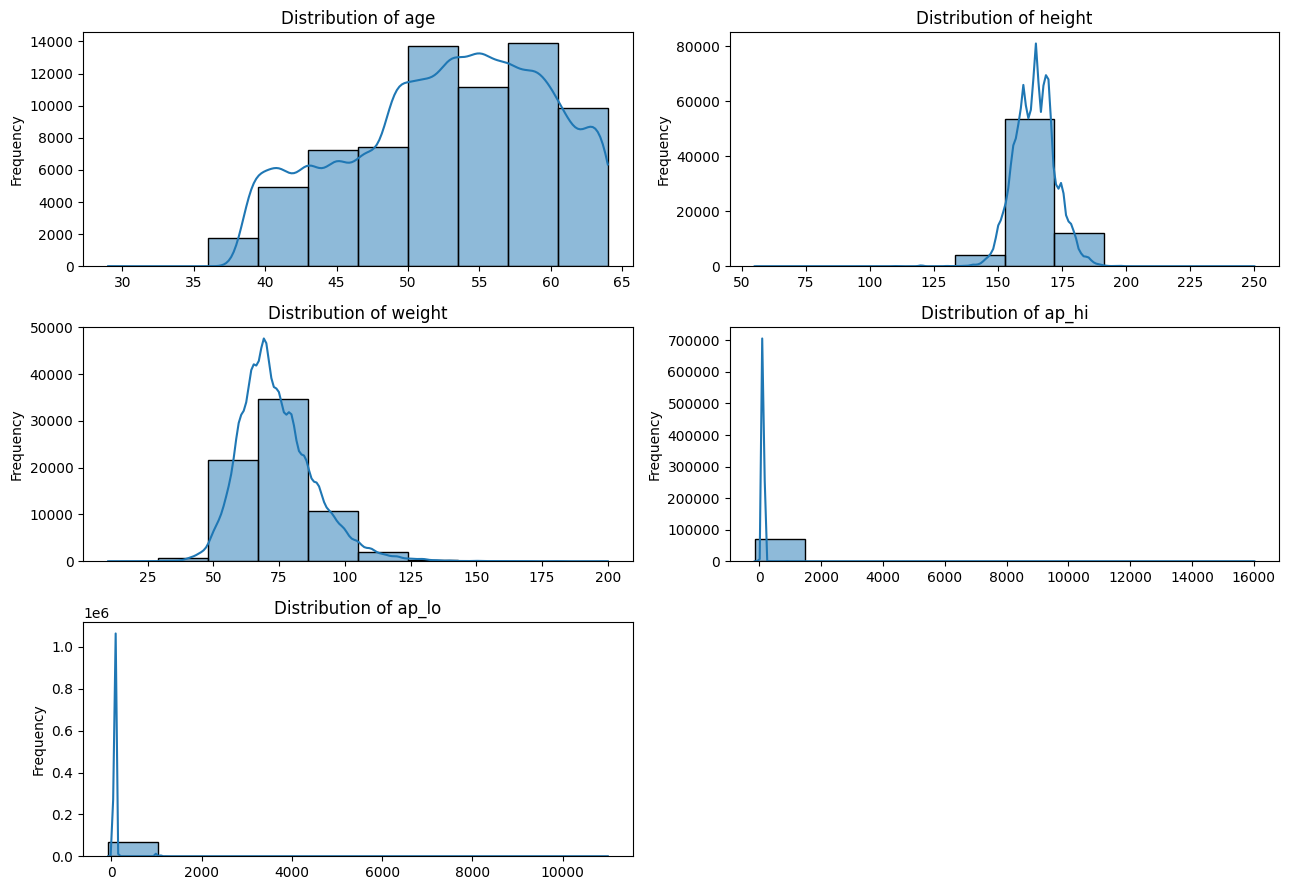

In [5]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

num_features = len(features)
num_rows = (num_features + 1) // 2

plt.figure(figsize=(13, num_rows * 3))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i + 1)

    if feature == 'age':
        data = (df[feature] / 365).astype(int)  
        ylabel = 'Age (Years)'
    else:
        data = df[feature]
        ylabel = feature

    sns.histplot(data, bins=10, kde=True, edgecolor='k')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **Mengecek Outlier Fitur Numerik**

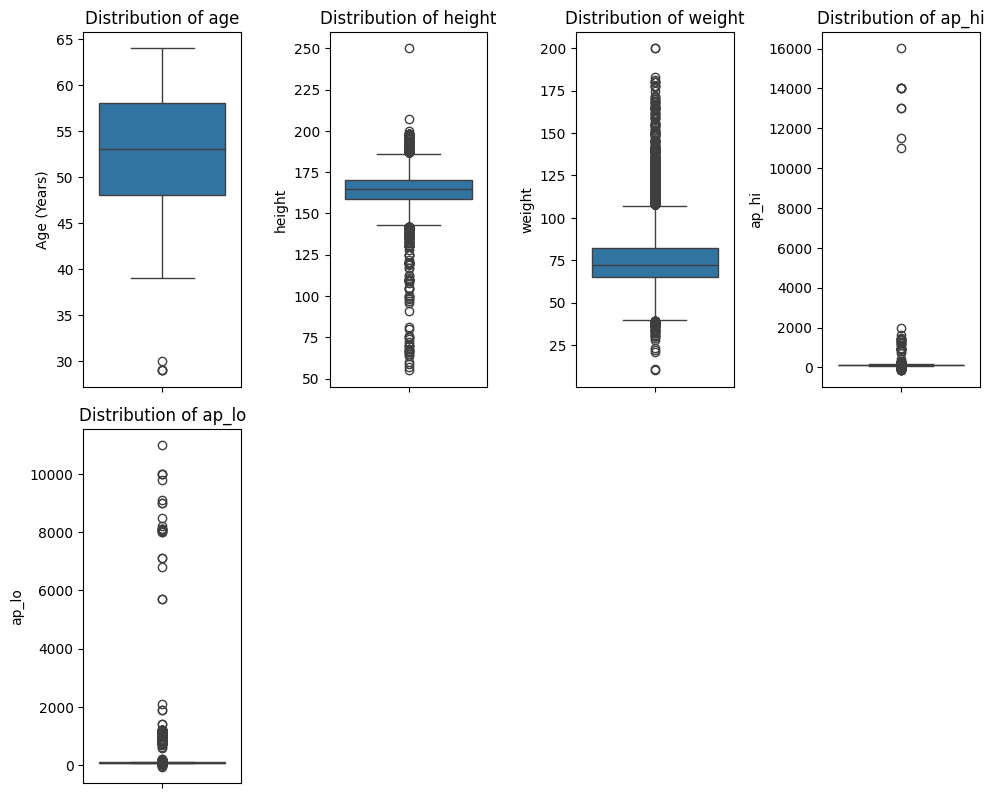

In [6]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


num_features = len(features)
num_rows = (num_features + 1) // 2 

plt.figure(figsize=(10, num_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(num_rows, 4, i + 1)
    
    if feature == 'age':
        data = (df[feature] / 365).astype(int)  
        ylabel = 'Age (Years)'
    else:
        data = df[feature]
        ylabel = feature

    sns.boxplot(y=data)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')  
    plt.ylabel(ylabel)

plt.tight_layout()
plt.show()

#### **Distribusi Variabel Kategorikal**

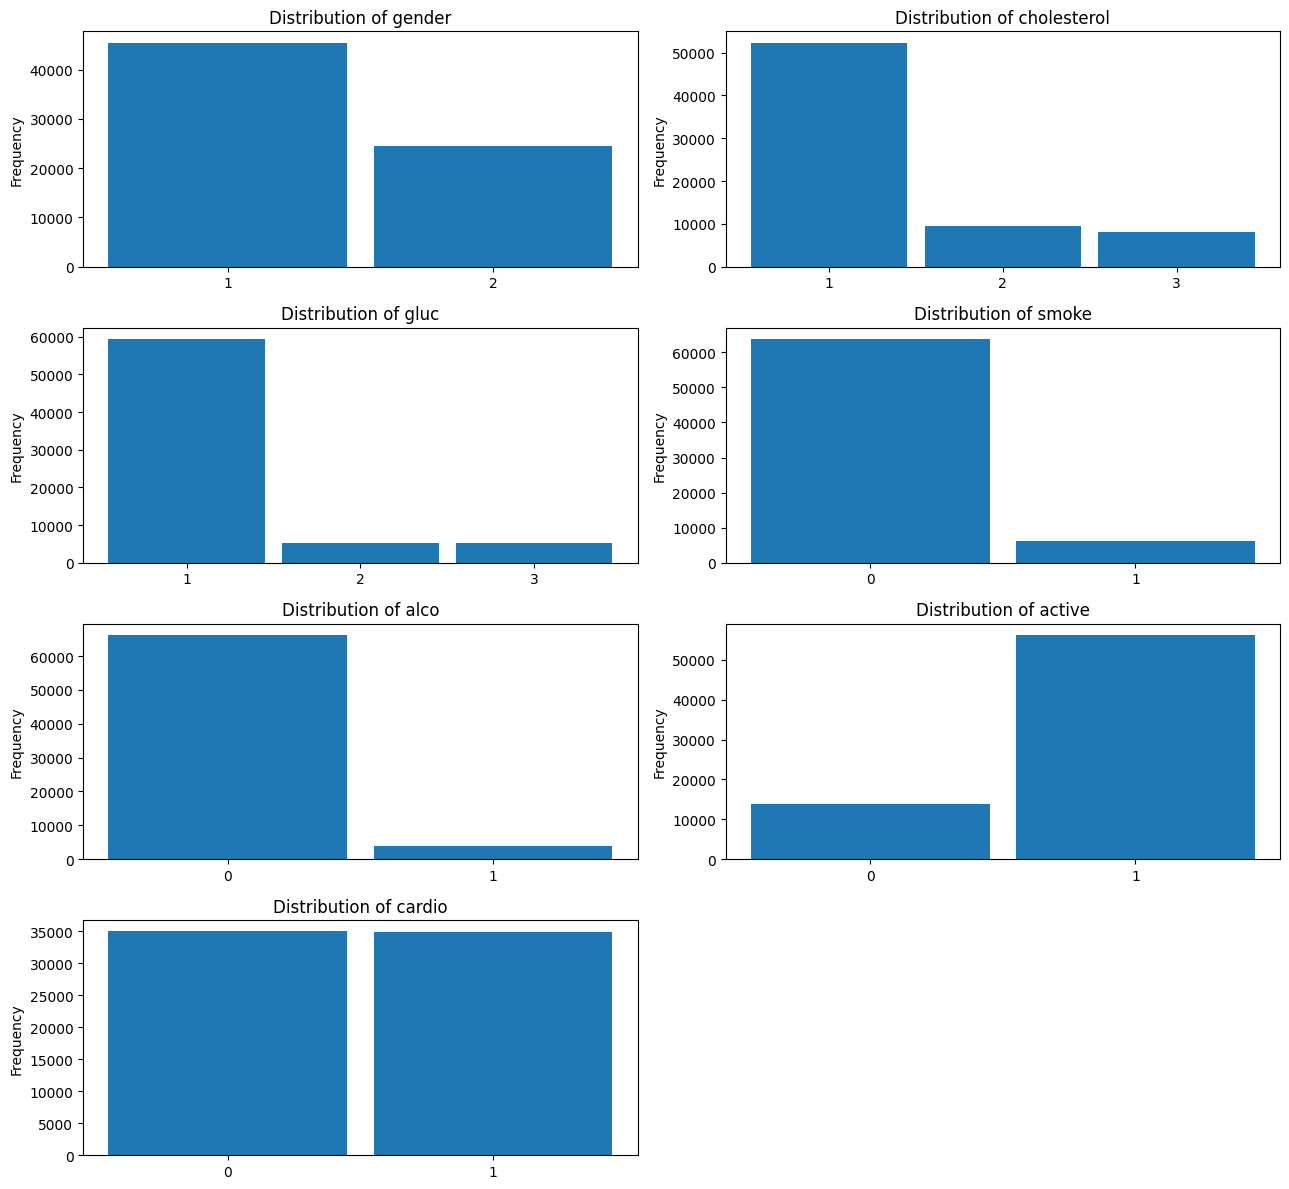

In [7]:
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cat_features = len(features)
cat_rows = (cat_features + 1) // 2

plt.figure(figsize=(13, cat_rows * 3))

for i, feature in enumerate(features):
    plt.subplot(cat_rows, 2, i + 1)
    data = df[feature]
    counts = data.value_counts().sort_index()
    unique_vals = sorted(data.unique())
    
    # Mengatur lebar bar agar ada jarak antar kategori
    bar_width = 0.9  # nilai kurang dari 1 untuk memberikan jarak
    plt.bar(counts.index, counts.values, width=bar_width)
    
    plt.xticks(unique_vals)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Matriks Korelasi**

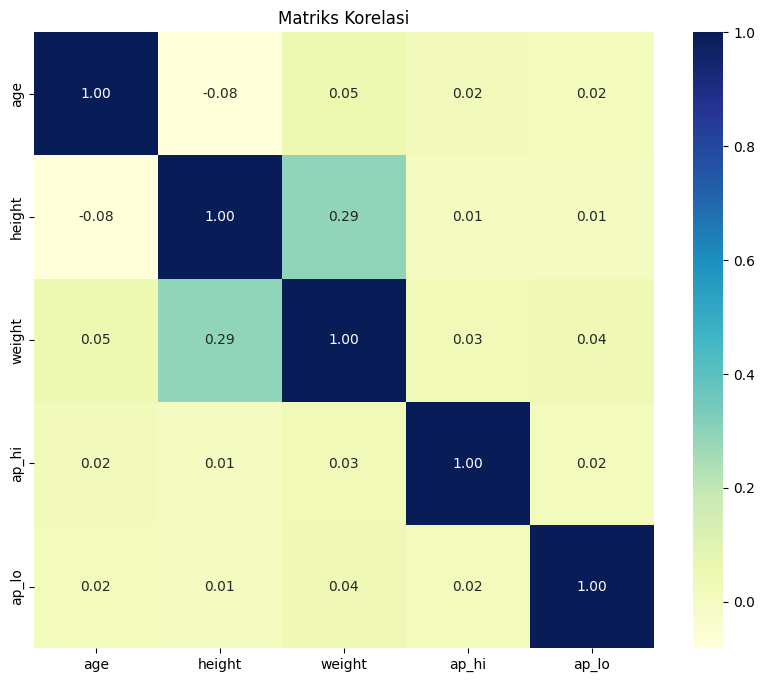

In [8]:
features =  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
corr = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

### **Data Preprocessing**

In [9]:
df = pd.read_csv('data/cardio.csv', sep=';')
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic'}, inplace=True)
print('Sample Data')
display(df.head())

display(df.describe())

Sample Data


,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:

# # Remove outliers for blood pressure using the IQR method.
# def remove_outliers_iqr(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# df = remove_outliers_iqr(df, ['systolic', 'diastolic', 'weight', 'height'])

# # Drop non-predictive columns, such as 'id', if it exists.
# if 'id' in df.columns:
#     df.drop(columns=['id'], inplace=True)

# # Define the categorical and target columns
# cat_cols = ['cholesterol', 'gluc','gender', 'smoke', 'alco', 'active']
# target_col = ['cardio']

# # Create a new order by taking all non-categorical, non-target columns first
# # then the categorical columns, and finally the target column
# new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

# # Reorder the DataFrame
# df = df[new_order]

# display(df.describe())

In [11]:
# Convert age from days to years and filter for adults (18 to 120 years)
df['age'] = (df['age'] / 365).astype(int)

# Validate blood pressure values:
# Ensure both systolic and diastolic are positive and systolic is greater than diastolic.
df = df[(df['systolic'] > 0) & (df['diastolic'] > 0)]
df = df[df['systolic'] > df['diastolic']]

# Remove outliers using the IQR method.
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, ['systolic', 'diastolic', 'weight', 'height'])


# Keep only valid categorical values
df = df[df['gender'].isin([1, 2])]
df = df[df['cholesterol'].isin([1, 2, 3])]
df = df[df['gluc'].isin([1, 2, 3])]
df = df[df['smoke'].isin([0, 1])]
df = df[df['alco'].isin([0, 1])]
df = df[df['active'].isin([0, 1])]

# Encode categorical data using separate LabelEncoder instances to avoid mapping conflicts.
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
print("Mapping for gender:", {original: encoded for original, encoded in zip(le_gender.classes_, range(len(le_gender.classes_)))})

le_chol = LabelEncoder()
df['cholesterol'] = le_chol.fit_transform(df['cholesterol'])
print("Mapping for cholesterol:", {original: encoded for original, encoded in zip(le_chol.classes_, range(len(le_chol.classes_)))})

le_gluc = LabelEncoder()
df['gluc'] = le_gluc.fit_transform(df['gluc'])
print("Mapping for gluc:", {original: encoded for original, encoded in zip(le_gluc.classes_, range(len(le_gluc.classes_)))})

# Drop non-predictive columns, such as 'id', if it exists.
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Define the categorical and target columns
cat_cols = ['cholesterol', 'gluc','gender', 'smoke', 'alco', 'active']
target_col = ['cardio']

# Create a new order by taking all non-categorical, non-target columns first
# then the categorical columns, and finally the target column
new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

# Reorder the DataFrame
df = df[new_order]

display(df.describe())

Mapping for gender: {1: 0, 2: 1}
Mapping for cholesterol: {1: 0, 2: 1, 3: 2}
Mapping for gluc: {1: 0, 2: 1, 3: 2}


,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,52.908035,164.405491,73.179792,126.421379,81.698026,0.357717,0.220649,0.348533,0.086333,0.052158,0.804342,0.493872
std,6.743158,7.530956,12.271424,14.288491,7.672500,0.675203,0.567601,0.476510,0.280858,0.222348,0.396709,0.499966
min,29.000000,143.000000,40.000000,90.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,186.000000,107.000000,170.000000,105.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
display(df.head())

,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,0,0,1,0,0,1,0
1,55,156,85.0,140,90,2,0,0,0,0,1,1
2,51,165,64.0,130,70,2,0,0,0,0,0,1
3,48,169,82.0,150,100,0,0,1,0,0,1,1
5,60,151,67.0,120,80,1,1,0,0,0,0,0


### **Exploratory Data Analysis (EDA) Tahap 2**

#### **Korelasi**

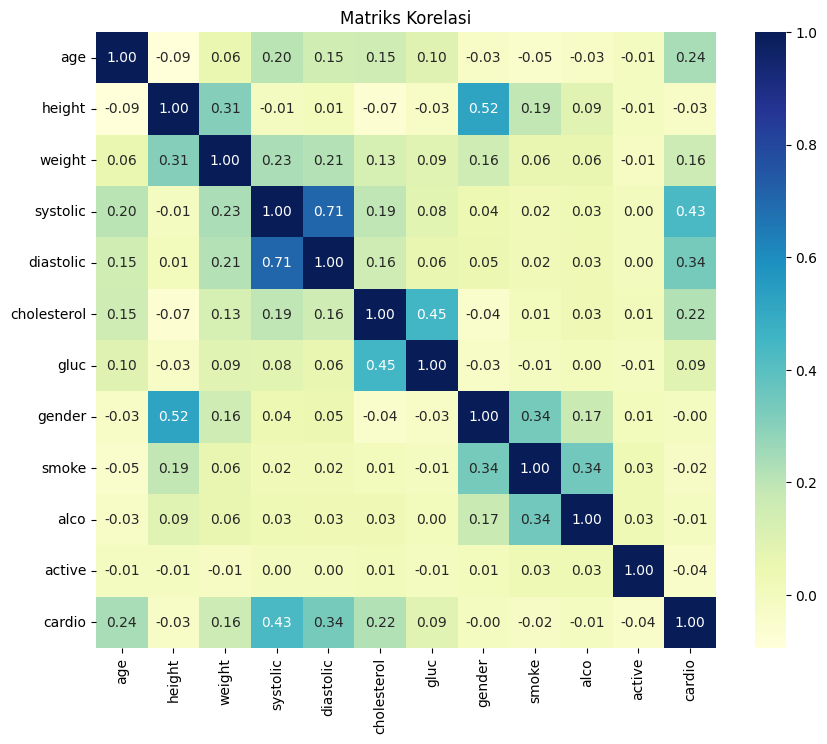

In [13]:
correlations = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

#### **Mengecek Imbalance Data**

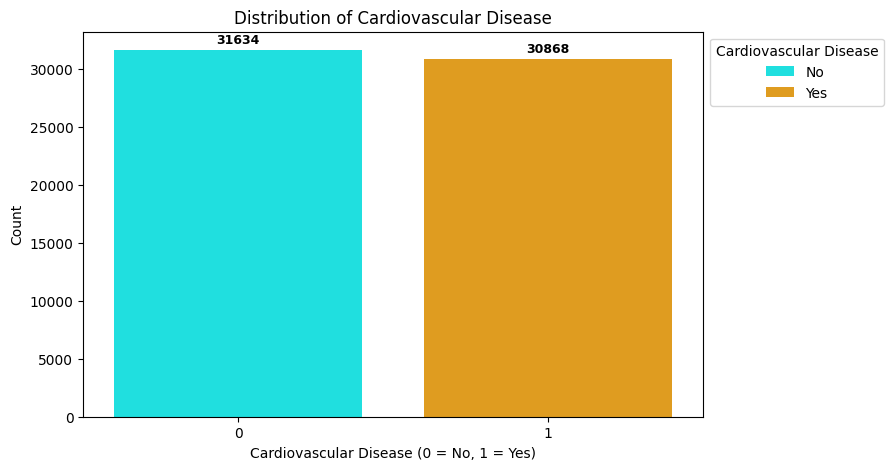

In [14]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

- Terdapat 32,337 pasien yang tidak memiliki penyakit kardiovaskular (nilai 0) dan 32,132 pasien yang memiliki penyakit kardiovaskular (nilai 1).
- Dataset ini cukup seimbang dengan hanya selisih 205 data antara pasien dengan dan tanpa penyakit kardiovaskular, sehingga model machine learning tidak rentan terhadap masalah ketidakseimbangan kelas.

#### **Distribusi Umur terhadap Penyakit Cardio**

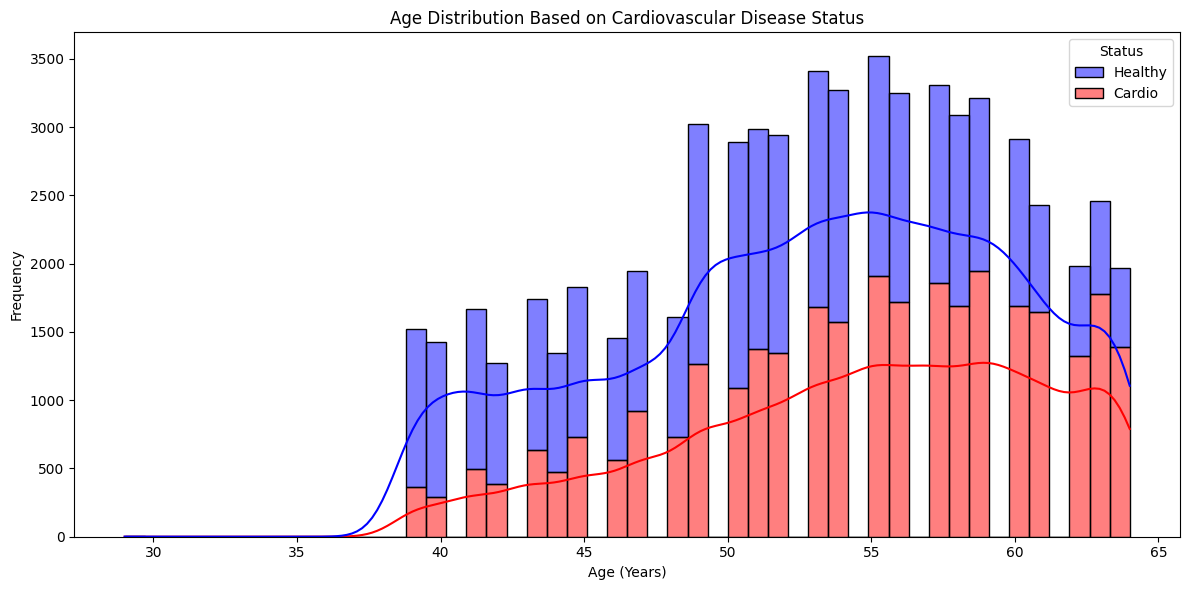

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='age', hue='cardio', multiple='stack', bins=50, kde=True, palette={0: 'blue', 1: 'red'})
plt.title('Age Distribution Based on Cardiovascular Disease Status')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.tight_layout()

legend = ax.get_legend()
legend.set_title("Status")
labels = ['Healthy', 'Cardio']
for i, text in enumerate(legend.texts):
    text.set_text(labels[i])
    
plt.show()



- Penyakit kardiovaskular lebih umum terjadi pada usia di atas 45 tahun, dengan puncak kasus pada rentang usia 50-60 tahun.
- Risiko penyakit kardiovaskular meningkat seiring bertambahnya usia, terutama setelah usia 45 tahun.

#### **Distribusi Gender terhadap Penyakit Cardio**

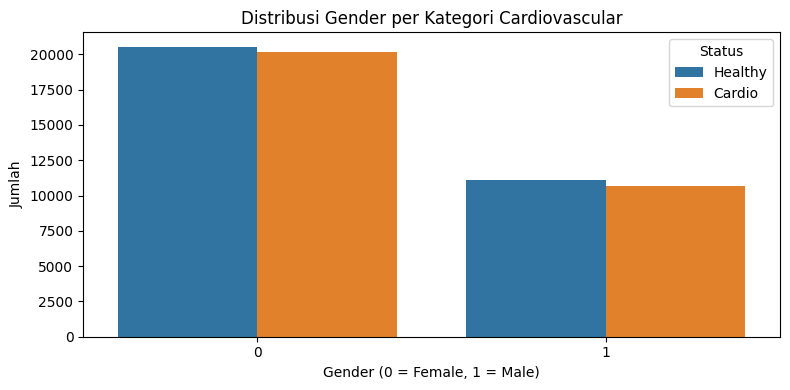

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))  # hanya satu subplot, sehingga 'ax' bukan array

sns.countplot(x='gender', hue='cardio', data=df, ax=ax)
ax.set_title('Distribusi Gender per Kategori Cardiovascular')
ax.set_xlabel('Gender (0 = Female, 1 = Male)')
ax.set_ylabel('Jumlah')
ax.legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout()
plt.show()

#### **Distribusi Kolesterol dan Glukosa terhadap Penyakit Cardio**

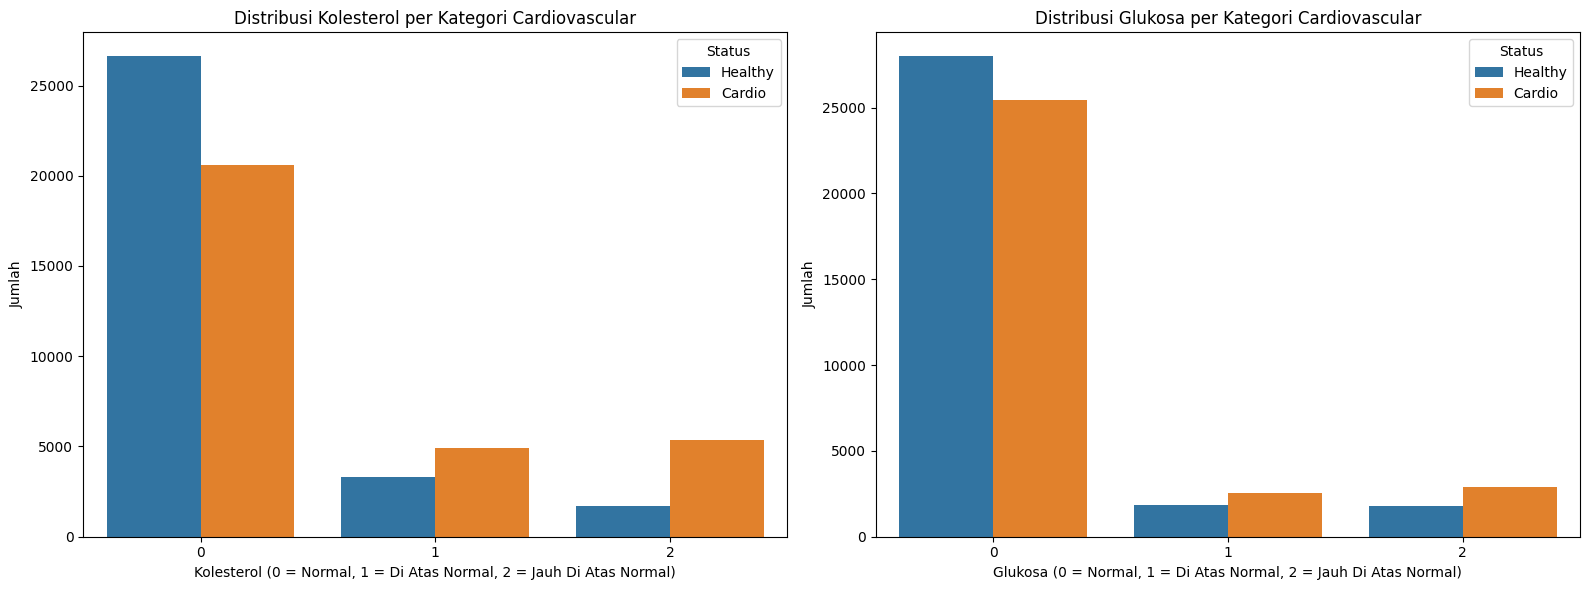

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribusi Kolesterol per Kategori Cardiovascular')
axs[0].set_xlabel('Kolesterol (0 = Normal, 1 = Di Atas Normal, 2 = Jauh Di Atas Normal)')
axs[0].set_ylabel('Jumlah')
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'])

sns.countplot(x='gluc', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribusi Glukosa per Kategori Cardiovascular')
axs[1].set_xlabel('Glukosa (0 = Normal, 1 = Di Atas Normal, 2 = Jauh Di Atas Normal)')
axs[1].set_ylabel('Jumlah')
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'])

plt.tight_layout() 
plt.show()


#### **Distribusi Gaya Hidup terhadap Penyakit Cardio**

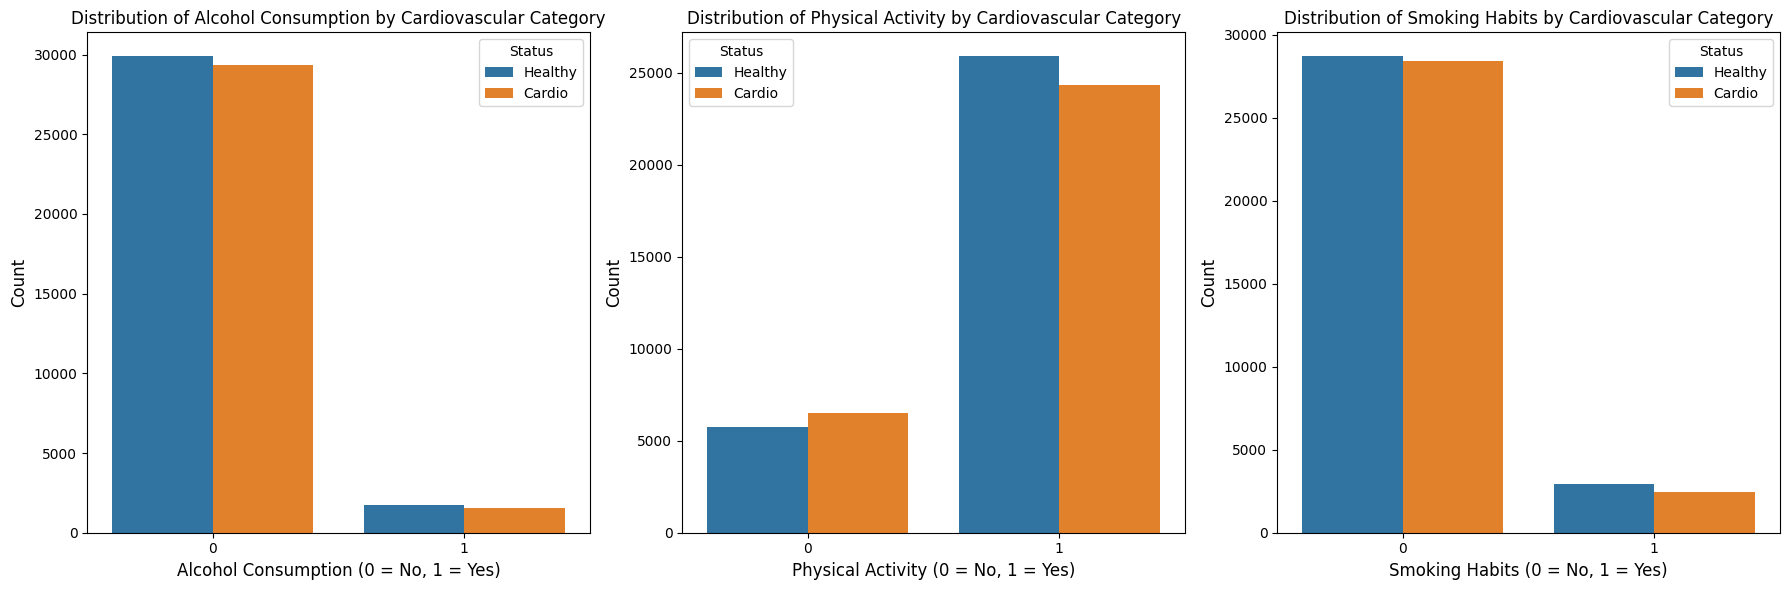

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Alcohol Consumption
sns.countplot(x='alco', hue='cardio', data=df, ax=axs[0])
axs[0].set_title('Distribution of Alcohol Consumption by Cardiovascular Category', fontsize=12)
axs[0].set_xlabel('Alcohol Consumption (0 = No, 1 = Yes)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot for Physical Activity
sns.countplot(x='active', hue='cardio', data=df, ax=axs[1])
axs[1].set_title('Distribution of Physical Activity by Cardiovascular Category', fontsize=12)
axs[1].set_xlabel('Physical Activity (0 = No, 1 = Yes)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

# Plot for Smoking Habits
sns.countplot(x='smoke', hue='cardio', data=df, ax=axs[2])
axs[2].set_title('Distribution of Smoking Habits by Cardiovascular Category', fontsize=12)
axs[2].set_xlabel('Smoking Habits (0 = No, 1 = Yes)', fontsize=12)
axs[2].set_ylabel('Count', fontsize=12)
axs[2].legend(title='Status', labels=['Healthy', 'Cardio'], fontsize=10)

plt.tight_layout()
plt.show()


### **Feature Engineering**

In [19]:
df['bmi'] = round(df['weight'] / (df['height'] / 100) ** 2,2)

def categorize_bmi(row):
    bmi = row['bmi']
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obesity Class I'
    elif bmi < 40:
        return 'Obesity Class II'
    else:
        return 'Obesity Class III'

df['bmi_category'] = df.apply(categorize_bmi, axis=1)

df['map'] = round((df['systolic'] + 2 * df['diastolic']) / 3,2)

def categorize_map(row):
    map_value = row['map']
    if map_value < 90:
        return 'Normal'
    elif 90 <= map_value < 92:
        return 'Prehypertension'
    elif 92 <= map_value < 96:
        return 'Stage-1 HT'
    else:
        return 'Stage-2 HT'

df['map_category'] = df.apply(categorize_map, axis=1)

bins = [0, 20, 40, 60, 100]
labels = ['Young', 'Middle-Aged', 'Older', 'Senior']

# Buat kolom kategori usia menggunakan pd.cut
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df["pulse_pressure"] = df["systolic"] - df["diastolic"]

In [20]:
display(df.head())
display(df.info())

,age,height,weight,systolic,diastolic,cholesterol,gluc,gender,smoke,alco,active,cardio,bmi,bmi_category,map,map_category,age_category,pulse_pressure
0,50,168,62.0,110,80,0,0,1,0,0,1,0,21.97,Normal,90.00,Prehypertension,Older,30
1,55,156,85.0,140,90,2,0,0,0,0,1,1,34.93,Obesity Class I,106.67,Stage-2 HT,Older,50
2,51,165,64.0,130,70,2,0,0,0,0,0,1,23.51,Normal,90.00,Prehypertension,Older,60
3,48,169,82.0,150,100,0,0,1,0,0,1,1,28.71,Overweight,116.67,Stage-2 HT,Older,50
5,60,151,67.0,120,80,1,1,0,0,0,0,0,29.38,Overweight,93.33,Stage-1 HT,Senior,40


<class 'pandas.core.frame.DataFrame'>
Index: 62502 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             62502 non-null  int64   
 1   height          62502 non-null  int64   
 2   weight          62502 non-null  float64 
 3   systolic        62502 non-null  int64   
 4   diastolic       62502 non-null  int64   
 5   cholesterol     62502 non-null  int64   
 6   gluc            62502 non-null  int64   
 7   gender          62502 non-null  int64   
 8   smoke           62502 non-null  int64   
 9   alco            62502 non-null  int64   
 10  active          62502 non-null  int64   
 11  cardio          62502 non-null  int64   
 12  bmi             62502 non-null  float64 
 13  bmi_category    62502 non-null  object  
 14  map             62502 non-null  float64 
 15  map_category    62502 non-null  object  
 16  age_category    62502 non-null  category
 17  pulse_pressure  6

None

<!-- ## Fitur Input dan Tipe

Dataset terdiri dari 70,000 data pasien dengan 19 fitur berikut:

| Nama Fitur                     | Tipe Fitur           | Nama Kolom dalam Data       | Tipe Data                                  |
|--------------------------------|----------------------|-----------------------------|--------------------------------------------|
| **Age**                        | Objective Feature    | age                         | int (years)                                |
| **Gender**                     | Objective Feature    | gender                      | binary; 0: female, 1: male                |
| **Height**                     | Objective Feature    | height                      | int (cm)                                   |
| **Weight**                     | Objective Feature    | weight                      | float (kg)                                 |
| **Systolic blood pressure**    | Examination Feature  | ap_hi                       | int (mm/Hg)                                |
| **Diastolic blood pressure**   | Examination Feature  | ap_lo                       | int (mm/Hg)                                |
| **Cholesterol**                | Examination Feature  | cholesterol                 | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Glucose**                    | Examination Feature  | gluc                        | ordinal; 1: normal, 2: above normal, 3: well above normal |
| **Smoking**                    | Subjective Feature   | smoke                       | binary; 0: no, 1: yes                      |
| **Alcohol intake**             | Subjective Feature   | alco                        | binary; 0: no, 1: yes                      |
| **Physical activity**          | Subjective Feature   | active                      | binary; 0: no, 1: yes                      |
| **Body Mass Index (BMI)**      | Derived Feature      | bmi                         | float                                      |
| **Age Group**                  | Derived Feature      | age_group                   | ordinal; 0: Young, 1: Middle-aged, 2: Senior |
| **Blood Pressure Category**    | Derived Feature      | blood_pressure_category     | ordinal; 0: Normal, 1: Elevated, 2: Hypertension Stage 1, 3: Hypertension Stage 2 |
| **Pulse Pressure**             | Derived Feature      | pulse_pressure              | int (mm/Hg)                                |
| **Mean Arterial Pressure** | Derived Feature     | map                         | float                                      |
| **Obesity Level**              | Derived Feature      | obesity_level               | ordinal; 0: Underweight, 1: Normal weight, 2: Overweight, 3: Obesity |
| **Systolic to Diastolic Ratio** | Derived Feature     | systolic_to_diastolic_ratio | float                                      |
| **Presence or Absence of Cardiovascular Disease** | Target Variable | cardio                   | binary; 0: healthy, 1: cardio              |

### Penjelasan Fitur Tambahan
- **BMI**: Indeks massa tubuh, dihitung berdasarkan berat dan tinggi badan.
- **Age Group**: Kelompok usia yang dibagi menjadi Young, Middle-aged, dan Senior.
- **Blood Pressure Category**: Kategori tekanan darah berdasarkan nilai systolic dan diastolic.
- **Pulse Pressure**: Selisih antara tekanan darah sistolik dan diastolik.
- **MAP**: Mean Arterial Pressure, rata-rata tekanan arteri selama satu siklus jantung.
- **Obesity Level**: Tingkat obesitas berdasarkan BMI.
- **Systolic to Diastolic Ratio**: Rasio antara tekanan darah sistolik dan diastolik.
 -->


In [21]:
cat_cols = ['cholesterol', 'gluc', 'gender', 'smoke', 'alco', 'active']
target_col = ['cardio']

new_order = [col for col in df.columns if col not in cat_cols + target_col] + cat_cols + target_col

df = df[new_order]

In [22]:
df

,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,21.97,Normal,90.00,Prehypertension,Older,30,0,0,1,0,0,1,0
1,55,156,85.0,140,90,34.93,Obesity Class I,106.67,Stage-2 HT,Older,50,2,0,0,0,0,1,1
2,51,165,64.0,130,70,23.51,Normal,90.00,Prehypertension,Older,60,2,0,0,0,0,0,1
3,48,169,82.0,150,100,28.71,Overweight,116.67,Stage-2 HT,Older,50,0,0,1,0,0,1,1
5,60,151,67.0,120,80,29.38,Overweight,93.33,Stage-1 HT,Senior,40,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,172,70.0,130,90,23.66,Normal,103.33,Stage-2 HT,Older,40,0,0,0,0,0,1,1
69994,57,165,80.0,150,80,29.38,Overweight,103.33,Stage-2 HT,Older,70,0,0,0,0,0,1,1
69995,52,168,76.0,120,80,26.93,Overweight,93.33,Stage-1 HT,Older,40,0,0,1,1,0,1,0
69998,61,163,72.0,135,80,27.10,Overweight,98.33,Stage-2 HT,Senior,55,0,1,0,0,0,0,1


In [23]:
#df.to_csv('data/cleaned_data.csv', index=False)

#### **2nd Data Preprocessing**

In [24]:
high_bp = (df['systolic'] > 140) | (df['diastolic'] > 90)
abnormal_cholesterol = (df['cholesterol'] != 0)
abnormal_glucose = (df['gluc'] != 0)
smoking = (df['smoke'] == 1)
alcohol = (df['alco'] == 1)
inactive = (df['active'] == 0)
bmi_risk = (df['bmi'] >= 25)

risk_condition = (
    high_bp & 
    abnormal_cholesterol & 
    abnormal_glucose & 
    smoking & 
    alcohol & 
    inactive & 
    bmi_risk
)

risk_but_no_cardio = df[risk_condition & (df['cardio'] == 0)]
print("Jumlah data risk_but_no_cardio:", len(risk_but_no_cardio))

normal_bp = (df['systolic'] <= 140) & (df['diastolic'] <= 90)
normal_cholesterol = (df['cholesterol'] == 0)
normal_glucose = (df['gluc'] == 0)
normal_bmi = (df['bmi'] >= 18.5) & (df['bmi'] < 25)
physically_active = (df['active'] == 1)
cardio_positive = (df['cardio'] == 1)

normal_condition = (
    normal_bp & 
    normal_cholesterol & 
    normal_glucose & 
    normal_bmi & 
    physically_active & 
    cardio_positive
)

normal_and_cardio = df[normal_condition]
print("Jumlah data normal_and_cardio:", len(normal_and_cardio))

Jumlah data risk_but_no_cardio: 1
Jumlah data normal_and_cardio: 4354


In [25]:
index_to_remove = risk_but_no_cardio.index.union(normal_and_cardio.index)
df.drop(index=index_to_remove, inplace=True)

print("Jumlah data setelah penghapusan:", len(df))

#df.drop(columns=['age', 'height', 'weight', 'systolic', 'diastolic', 'bmi', 'map'], inplace=True)

# Encode kolom bmi_category
desired_order_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity Class I','Obesity Class II', 'Obesity Class III']
df['bmi_category'] = pd.Categorical(df['bmi_category'], categories=desired_order_bmi, ordered=True)
df['bmi_category'] = df['bmi_category'].cat.codes
mapping = {category: code for category, code in zip(desired_order_bmi, range(len(desired_order_bmi)))}
print("Mapping for bmi_category:", mapping)

# Encode kolom map_category
le_map = LabelEncoder()
df['map_category'] = le_map.fit_transform(df['map_category'])
print("Mapping for map_category:", {cls: encoded for cls, encoded in zip(le_map.classes_, le_map.transform(le_map.classes_))})


# Lakukan encoding pada kategori usia
desired_order = ['Young', 'Middle-Aged', 'Older', 'Senior']
df['age_category'] = pd.Categorical(df['age_category'], categories=desired_order, ordered=True)
df['age_category'] = df['age_category'].cat.codes
mapping = {category: code for category, code in zip(desired_order, range(len(desired_order)))}
print("Mapping for age_category:", mapping)

df

# 0–20 → 'Young'

# 21–40 → 'Middle-Aged'

# 41–60 → 'Older'

# 61–100 → 'Senior'

Jumlah data setelah penghapusan: 58147
Mapping for bmi_category: {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obesity Class I': 3, 'Obesity Class II': 4, 'Obesity Class III': 5}
Mapping for map_category: {'Normal': 0, 'Prehypertension': 1, 'Stage-1 HT': 2, 'Stage-2 HT': 3}
Mapping for age_category: {'Young': 0, 'Middle-Aged': 1, 'Older': 2, 'Senior': 3}


,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
0,50,168,62.0,110,80,21.97,1,90.00,1,2,30,0,0,1,0,0,1,0
1,55,156,85.0,140,90,34.93,3,106.67,3,2,50,2,0,0,0,0,1,1
2,51,165,64.0,130,70,23.51,1,90.00,1,2,60,2,0,0,0,0,0,1
3,48,169,82.0,150,100,28.71,2,116.67,3,2,50,0,0,1,0,0,1,1
5,60,151,67.0,120,80,29.38,2,93.33,2,3,40,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,51,161,56.0,170,90,21.60,1,116.67,3,2,80,0,0,0,0,0,1,1
69994,57,165,80.0,150,80,29.38,2,103.33,3,2,70,0,0,0,0,0,1,1
69995,52,168,76.0,120,80,26.93,2,93.33,2,2,40,0,0,1,1,0,1,0
69998,61,163,72.0,135,80,27.10,2,98.33,3,3,55,0,1,0,0,0,0,1


In [26]:
display(df.describe())

,age,height,weight,systolic,diastolic,bmi,bmi_category,map,map_category,age_category,pulse_pressure,cholesterol,gluc,gender,smoke,alco,active,cardio
count,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000,58147.000000
mean,52.825012,164.293412,73.872082,126.598260,81.781450,27.414081,1.999742,96.719321,2.046589,2.159320,44.816809,0.384491,0.237158,0.346656,0.088259,0.053606,0.789705,0.455982
std,6.753425,7.565846,12.325567,14.552249,7.775866,4.587795,0.945065,9.276358,1.049073,0.429337,10.577391,0.692632,0.585126,0.475909,0.283674,0.225240,0.407521,0.498063
min,29.000000,143.000000,40.000000,90.000000,65.000000,13.520000,0.000000,73.330000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,24.090000,1.000000,93.330000,2.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,26.670000,2.000000,93.330000,2.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.120000,3.000000,103.330000,3.000000,2.000000,50.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,186.000000,107.000000,170.000000,105.000000,50.890000,5.000000,126.000000,3.000000,3.000000,103.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


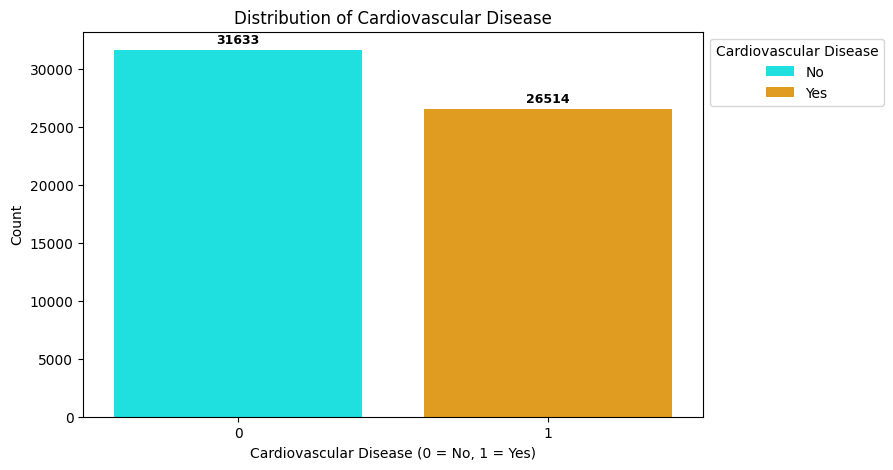

In [27]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='cardio', data=df, hue='cardio', palette={0: 'aqua', 1: 'orange'})

plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=9, color='black', fontweight='bold', 
                    xytext=(0, 5), textcoords='offset points')

plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [28]:
#df.to_csv('data/preprocessed_data_full_encoded.csv', index=False)